In [1]:
# %load np_load_allow_pickle_True.py
import numpy as np 
np_load_old = np.load
np.load = lambda *a, **k: np_load_old(*a, allow_pickle=True, **k)

# np.load 사용 후 반드시 아래 코드를 실행할 것!!!
# np.load = np_load_old

In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = \
    reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [3]:
np.load = np_load_old

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [6]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

W0718 14:53:03.046045  7396 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0718 14:53:03.059045  7396 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0718 14:53:03.062044  7396 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

W0718 14:53:03.102046  7396 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\deeplearning\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0718 14:53:03.119050  7396 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [8]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

W0718 14:53:03.243111  7396 deprecation.py:323] From C:\Users\user\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0718 14:53:03.279112  7396 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 159us/step - loss: 3.2211 - acc: 0.4202 - val_loss: 2.4396 - val_acc: 0.5340
Epoch 2/20
7982/7982 [==============================] - 1s 116us/step - loss: 1.9550 - acc: 0.5755 - val_loss: 1.6339 - val_acc: 0.6240
Epoch 3/20
7982/7982 [==============================] - 1s 116us/step - loss: 1.3873 - acc: 0.6991 - val_loss: 1.3525 - val_acc: 0.7070
Epoch 4/20
7982/7982 [==============================] - 1s 116us/step - loss: 1.0973 - acc: 0.7601 - val_loss: 1.1878 - val_acc: 0.7410
Epoch 5/20
7982/7982 [==============================] - 1s 116us/step - loss: 0.8771 - acc: 0.8107 - val_loss: 1.0758 - val_acc: 0.7670
Epoch 6/20
7982/7982 [==============================] - 1s 115us/step - loss: 0.6967 - acc: 0.8500 - val_loss: 0.9898 - val_acc: 0.7870
Epoch 7/20
7982/7982 [==============================] - 1s 116us/step - loss: 0.5488 - acc: 0.8850 - val_loss: 0.9407 - val_acc: 0.7970


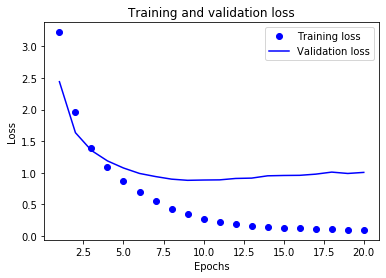

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

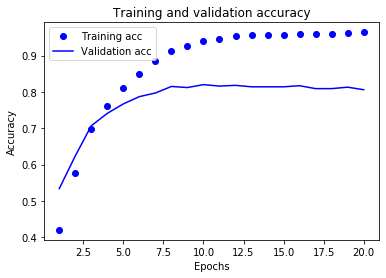

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

In [12]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 142us/step - loss: 3.2221 - acc: 0.4034 - val_loss: 2.5123 - val_acc: 0.5570
Epoch 2/9
7982/7982 [==============================] - 1s 114us/step - loss: 1.9640 - acc: 0.6171 - val_loss: 1.6095 - val_acc: 0.6540
Epoch 3/9
7982/7982 [==============================] - 1s 114us/step - loss: 1.3344 - acc: 0.7144 - val_loss: 1.2899 - val_acc: 0.7040
Epoch 4/9
7982/7982 [==============================] - 1s 115us/step - loss: 1.0340 - acc: 0.7751 - val_loss: 1.1390 - val_acc: 0.7490
Epoch 5/9
7982/7982 [==============================] - 1s 113us/step - loss: 0.8198 - acc: 0.8173 - val_loss: 1.0352 - val_acc: 0.7770
Epoch 6/9
7982/7982 [==============================] - 1s 115us/step - loss: 0.6428 - acc: 0.8602 - val_loss: 0.9715 - val_acc: 0.7940
Epoch 7/9
7982/7982 [==============================] - 1s 115us/step - loss: 0.4977 - acc: 0.8920 - val_loss: 0.9166 - val_acc: 0.8130
Epoch 8

In [13]:
results

[0.9745061189493535, 0.786731967996086]

In [14]:
predictions = model.predict(x_test)
print(predictions[0].max())
print(np.argmax(predictions[0]))

0.7483257
3
